In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_columns', 30)

In [ ]:
df = pd.read_csv(r"/content/kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df.shape

(400, 26)

In [ ]:
#Dropping out unnecessary columns
df.drop('id',axis=1,inplace=True)

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume, errors = 'coerce')

In [ ]:
df['white_blood_cell_count'] = pd.to_numeric(df.white_blood_cell_count, errors = 'coerce')

In [ ]:
df['red_blood_cell_count'] = pd.to_numeric(df.red_blood_cell_count, errors = 'coerce')

In [ ]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
object_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [ ]:
numeric_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
#Finding all the unqiue values

for col in object_cols:
  print(f"{col} has {df[col].unique()} values.\n") #This loop is ran again after the error connection followed below

red_blood_cells has [nan 'normal' 'abnormal'] values.

pus_cell has ['normal' 'abnormal' nan] values.

pus_cell_clumps has ['notpresent' 'present' nan] values.

bacteria has ['notpresent' 'present' nan] values.

hypertension has ['yes' 'no' nan] values.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values.

coronary_artery_disease has ['no' 'yes' '\tno' nan] values.

appetite has ['good' 'poor' nan] values.

peda_edema has ['no' 'yes' nan] values.

aanemia has ['no' 'yes' nan] values.

class has ['ckd' 'ckd\t' 'notckd'] values.



In [ ]:
#Replacing incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes', ' yes': 'yes'}, inplace=True)

In [ ]:
#Replacing incorrect values
df['coronary_artery_disease'].replace(to_replace = {'\tno' : 'no'}, inplace=True)

In [ ]:
#Replacing incorrect values
df['class'].replace(to_replace = {'ckd\t' : 'ckd', 'notckd' : 'not ckd'}, inplace=True)

In [ ]:
#Converting the class 'class' into 'int64'

df['class'] =df['class'].map({'ckd':0,'not ckd':1})

In [ ]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

Univariate Analysis



In [ ]:
plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [ ]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

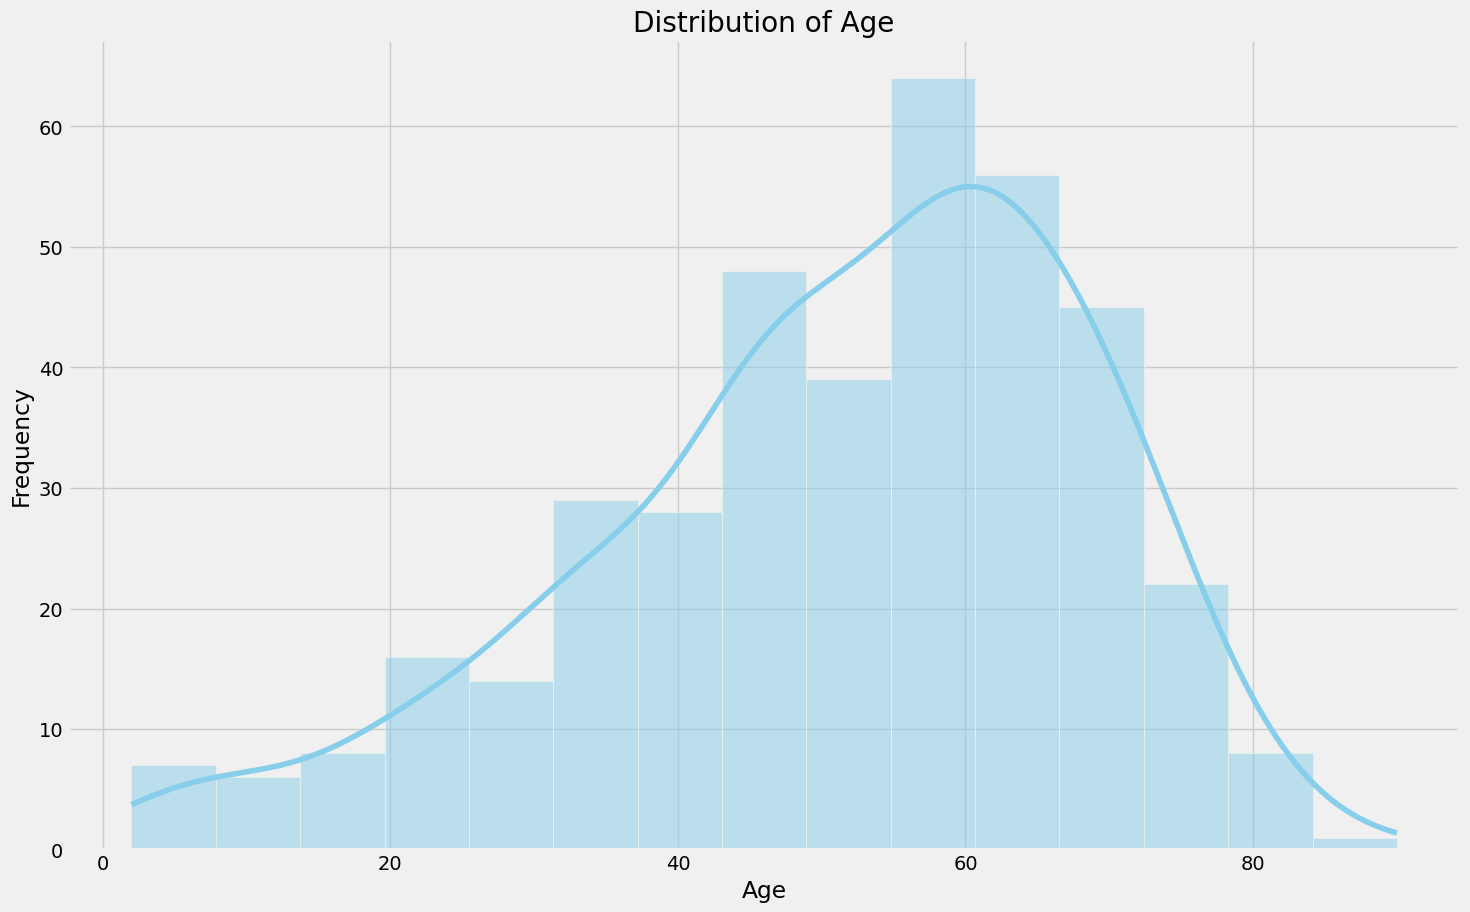

In [ ]:
plt.figure(figsize=(16,10))
sns.histplot(df['age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Insights:-

///Age : 50 is mean
Most People with diseases are 40 to 60
Older People are with lesser disease
Younger People (0 to 40) are more than Older People (60 to 80)///

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
#Find how many people are with hypertension

df.hypertension



0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

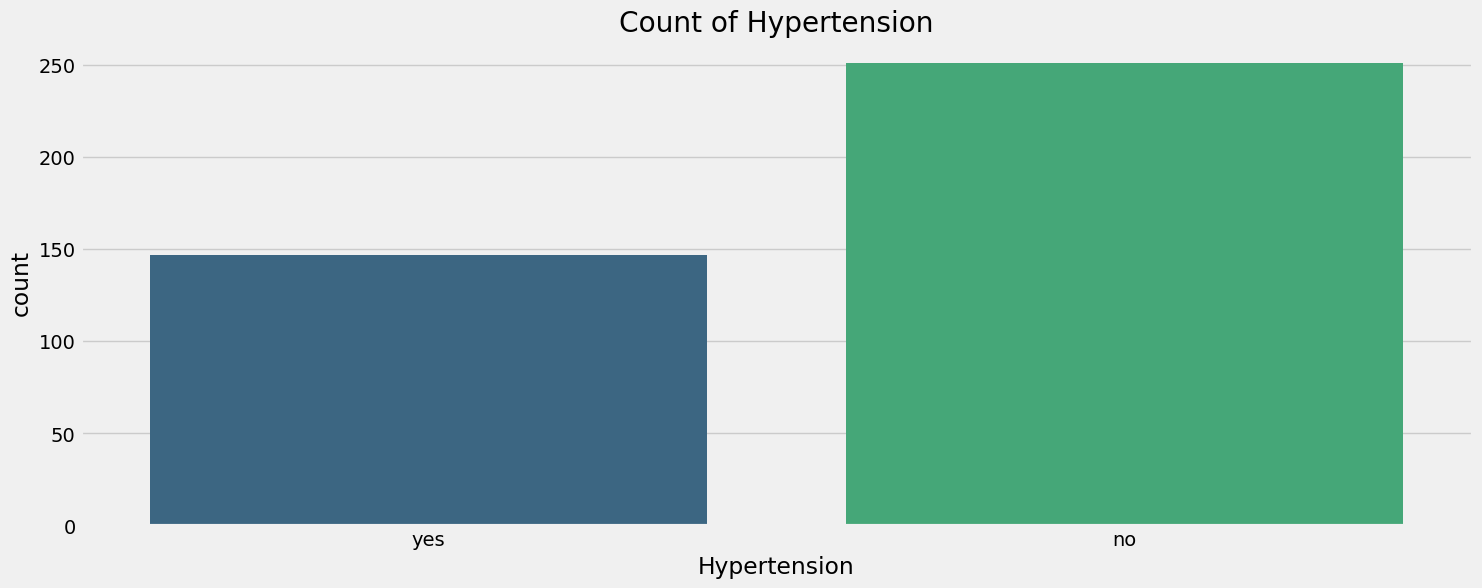

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='hypertension',data=df,palette='viridis')
plt.title('Count of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('count')
plt.show()


In [ ]:
#Insights

#ABout 150 has hypertension

df_temp = df[df['class']== 0]
df_temp['hypertension'].value_counts()

yes    147
no     103
Name: hypertension, dtype: int64

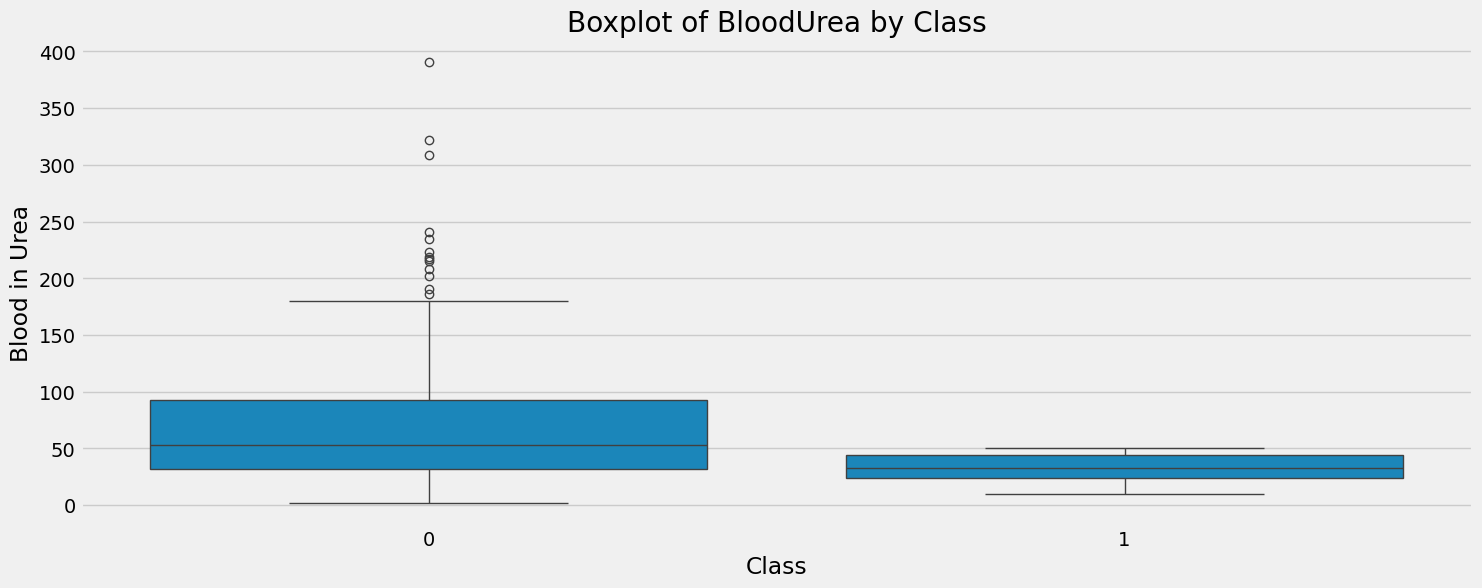

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x = 'class', y='blood_urea',data=df)
plt.xlabel('Class')
plt.ylabel('Blood in Urea')
plt.title('Boxplot of BloodUrea by Class')
plt.show()


In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

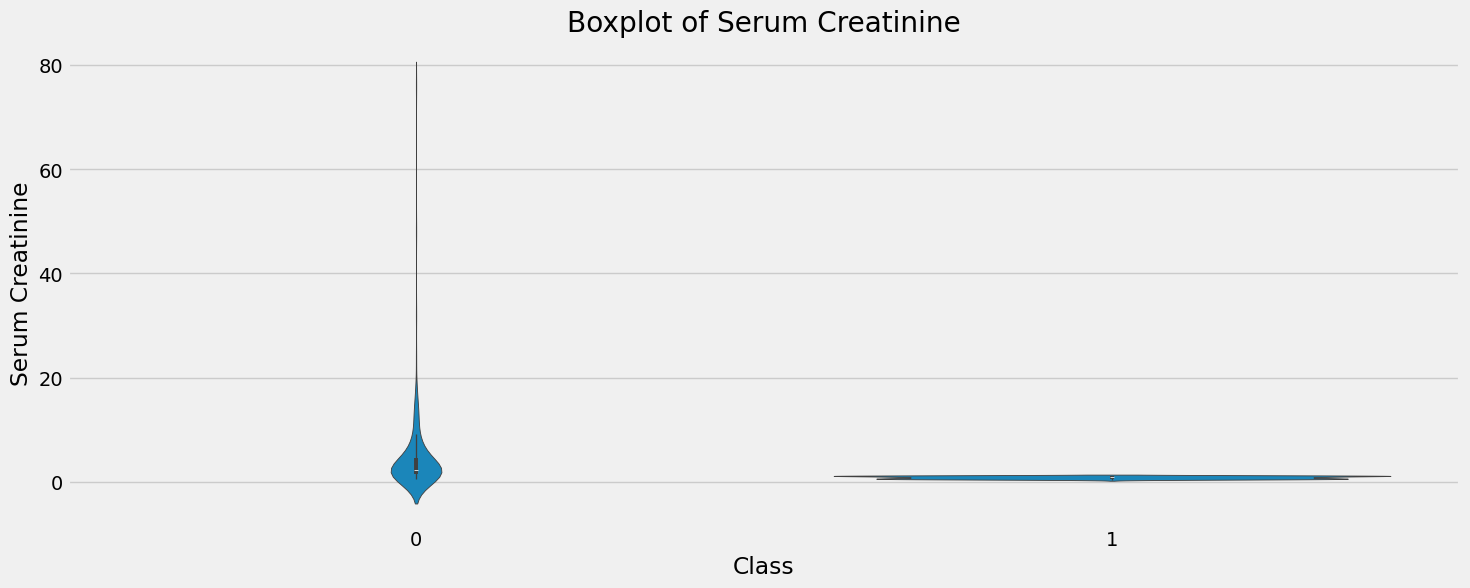

In [ ]:
plt.figure(figsize=(16,6))
sns.violinplot(x = 'class', y='serum_creatinine',data=df)
plt.xlabel('Class')
plt.ylabel('Serum Creatinine')
plt.title('Boxplot of Serum Creatinine')
plt.show()


In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

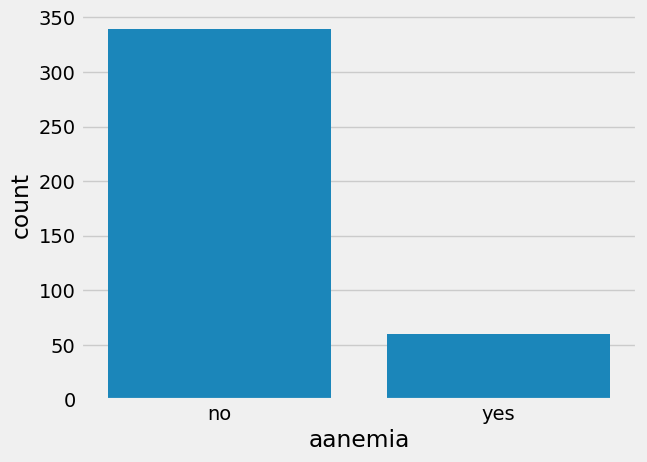

In [ ]:
sns.countplot(x='aanemia', data=df)

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
df.appetite

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

In [ ]:
df['appetitie'].value_counts().plot.pie()

SyntaxError: invalid syntax (<ipython-input-16-b32e7f1ecb23>, line 1)

In [ ]:
#How to analyze the ppl having  chronic disease and hypertension with poor appetite?

<Axes: xlabel='peda_edema', ylabel='count'>

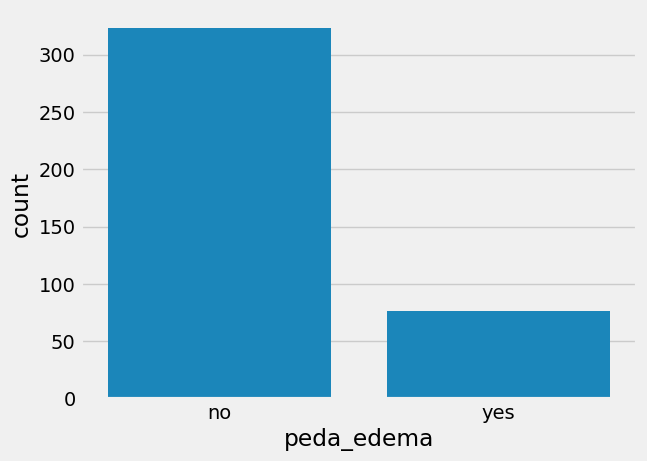

In [ ]:
sns.countplot(x=df['peda_edema'])

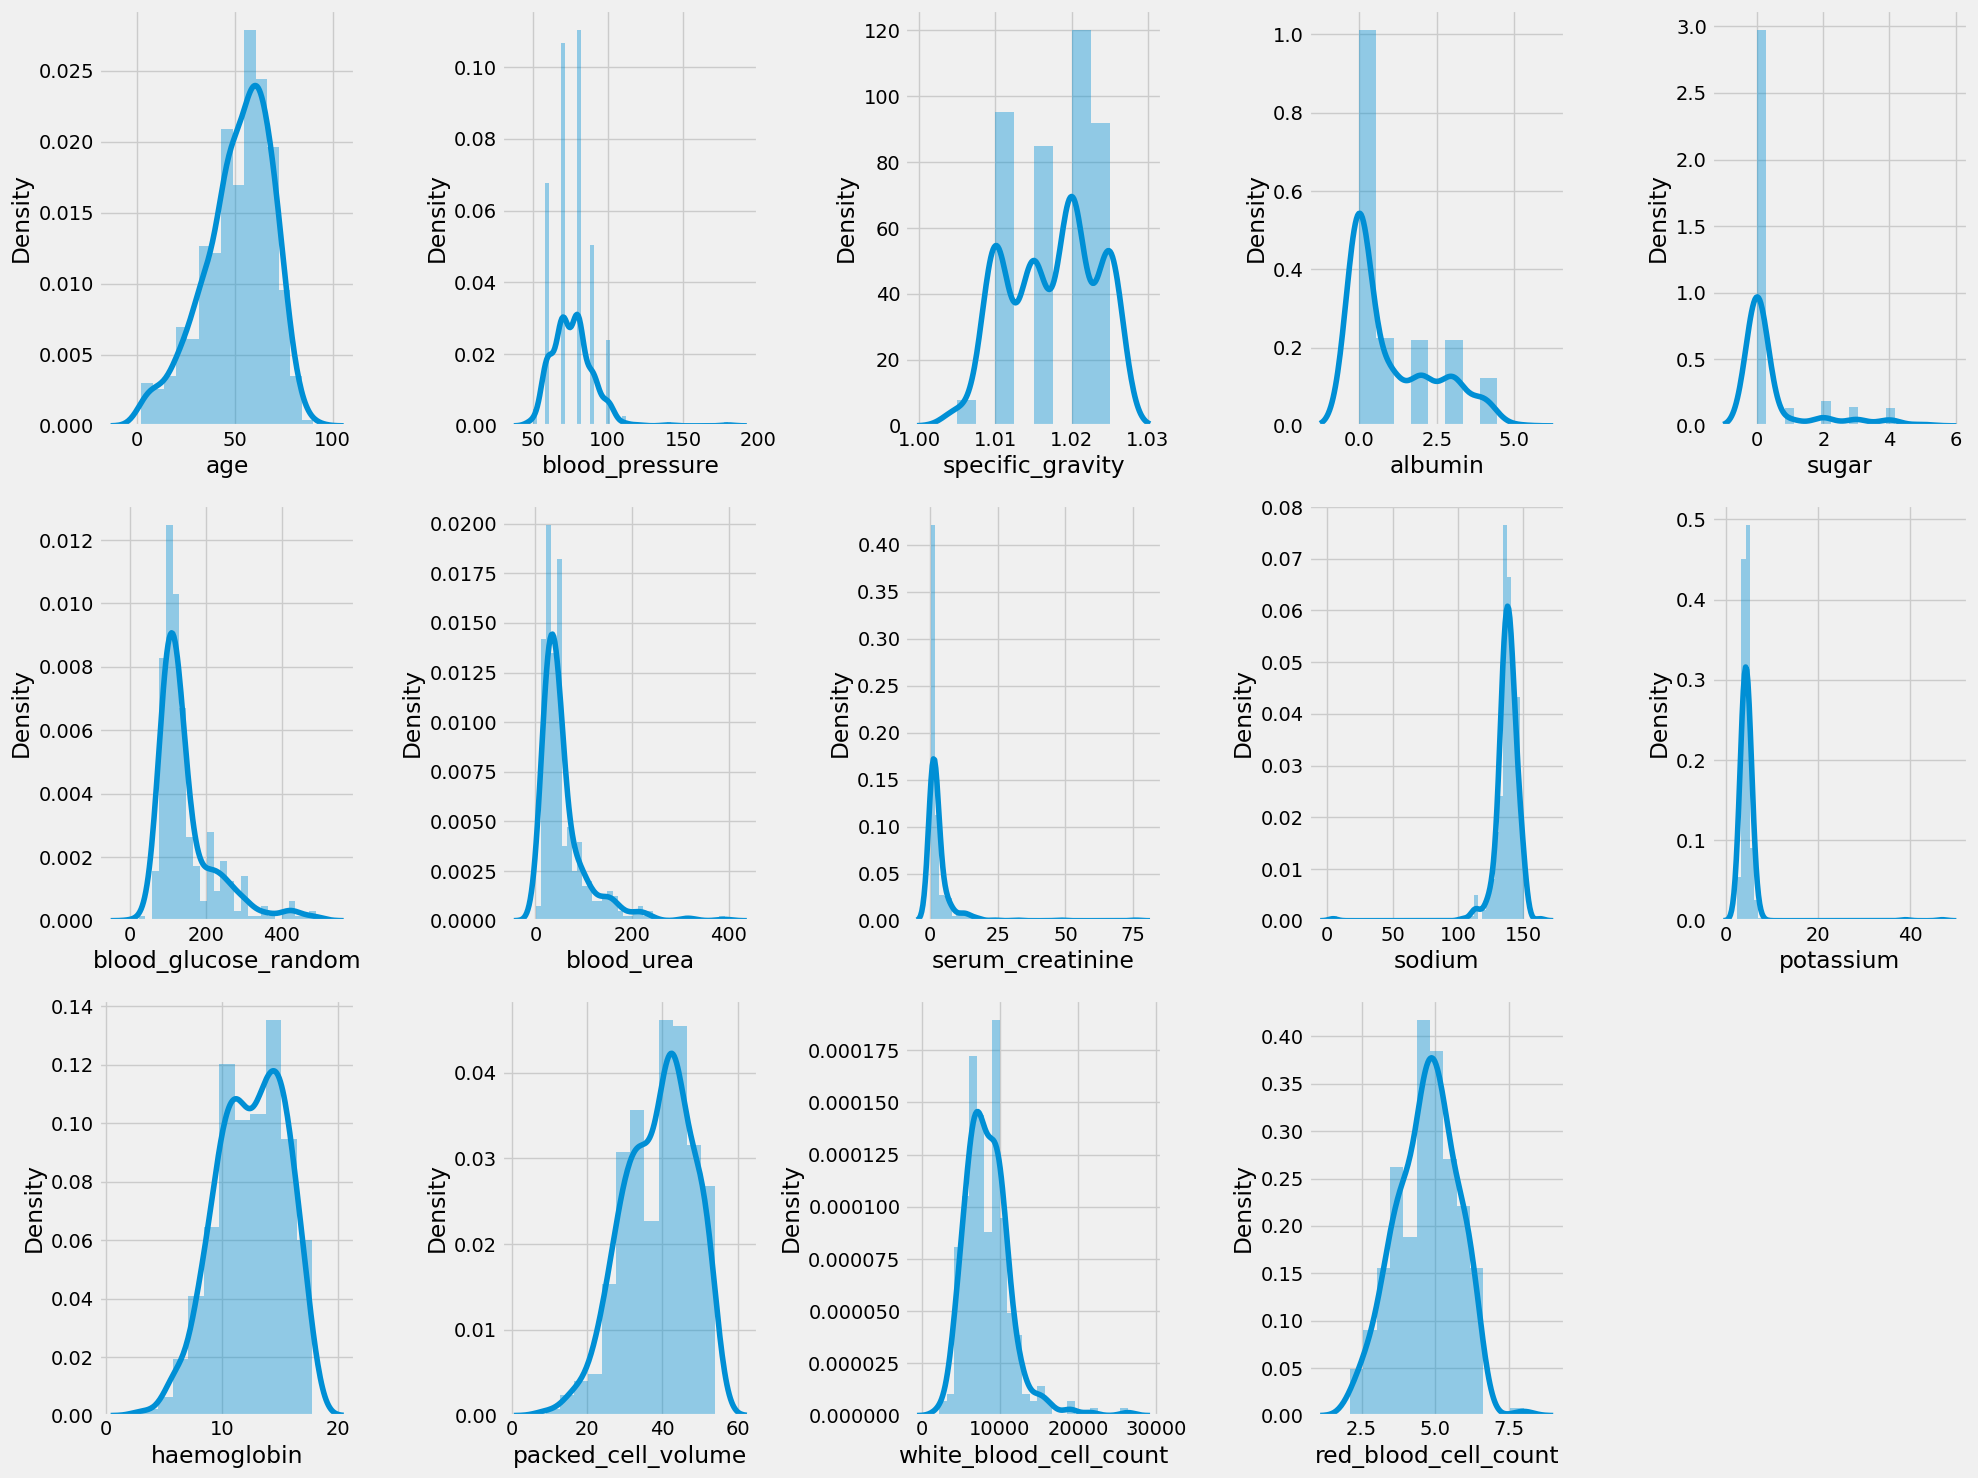

In [ ]:
plt.figure(figsize = (20,15))
plotnumber = 1


for col in numeric_cols:
  if plotnumber <= 15:
    ax = plt.subplot(3,5,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
  plotnumber+=1

plt.tight_layout()
plt.show()




In [ ]:
def kde(col):
  grid = sns.FacetGrid(df, hue="class",height=6,aspect=2)
  grid.map(sns.kdeplot, col)
  grid.add_legend()

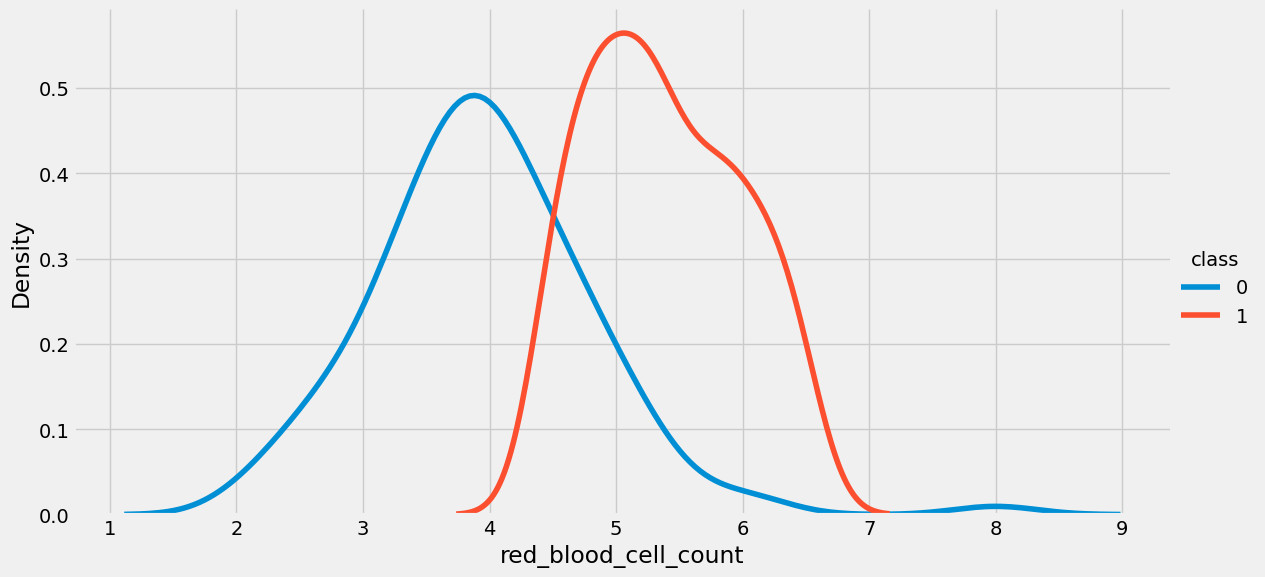

In [ ]:
kde('red_blood_cell_count')

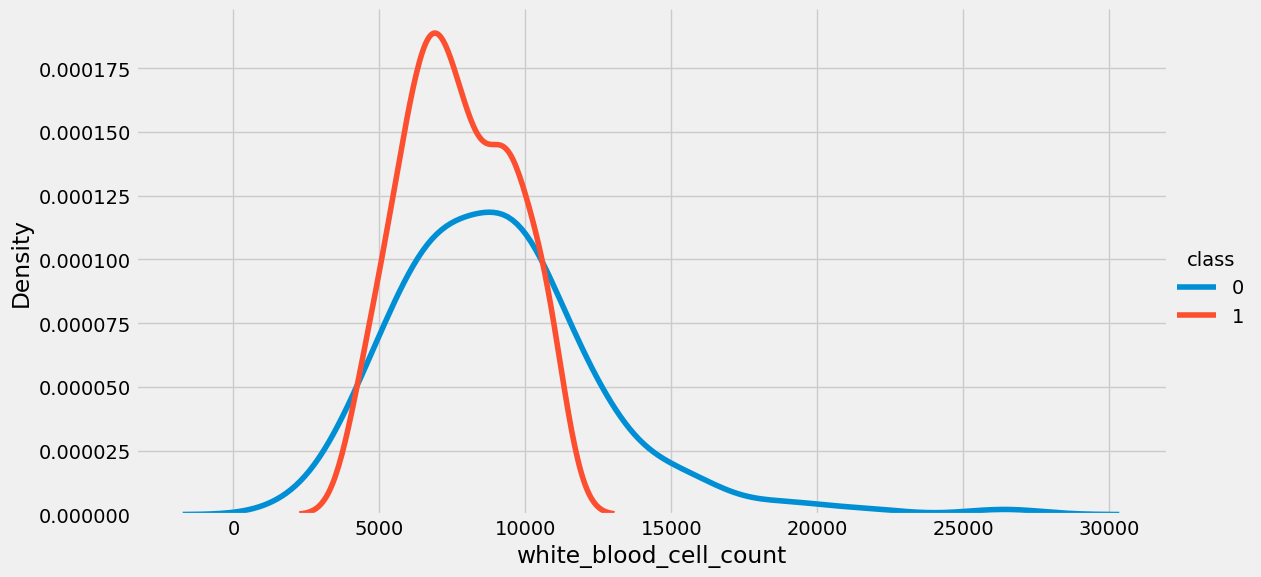

In [ ]:
kde('white_blood_cell_count')

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

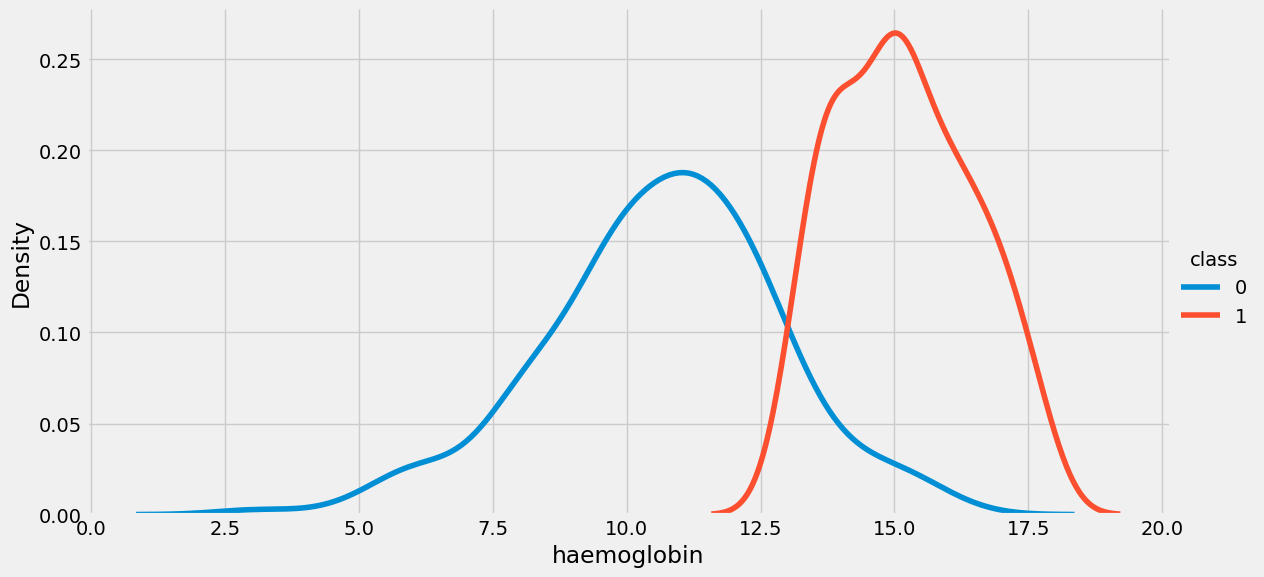

In [ ]:
kde('haemoglobin')

In [ ]:
def violin(col):
      fig = px.violin(df, y=col, x='class', box=True, template = 'plotly_dark')
      return fig.show()


In [ ]:
numeric_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
violin('blood_pressure')
#Insights : Outliers are present >> For Chronic Disease > 140 and 180

In [ ]:
violin('haemoglobin')

In [ ]:
violin('specific_gravity')

Bivariate

<Axes: xlabel='age', ylabel='blood_pressure'>

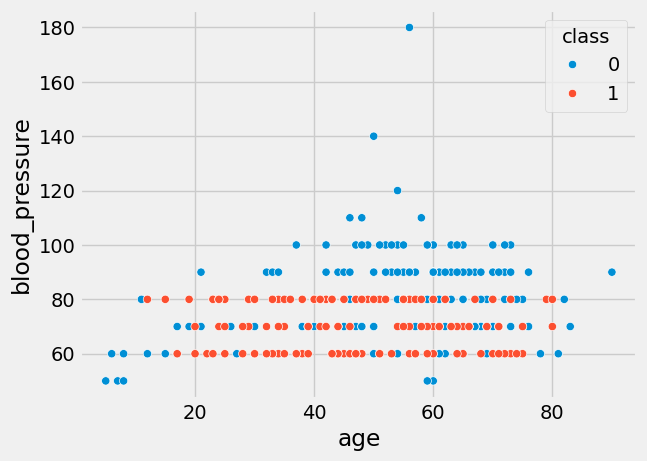

In [ ]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df, hue='class')
#Insights >> high bp certainly is a recurrent pattern in patients with chronic diseases

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


Text(0, 0.5, 'Count')

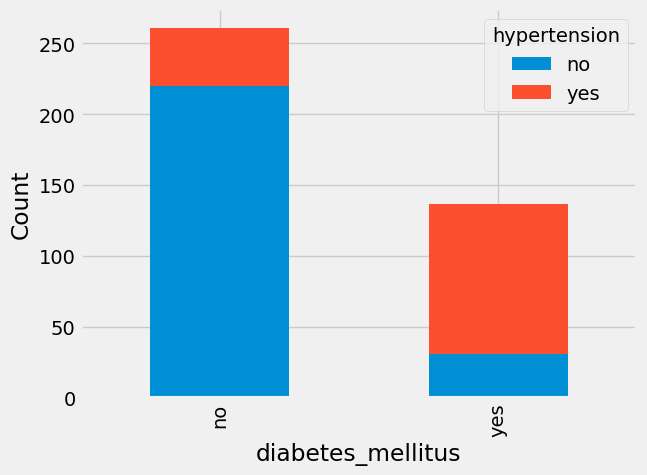

In [ ]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked =  True)
plt.ylabel('Count')

In [ ]:
def scatter(col1, col2):
  fig = px.scatter(df, x = col1, y = col2, color = "class", template = "plotly_dark")
  return fig.show()


In [ ]:
scatter('haemoglobin', 'packed_cell_volume')

Multivariate Analysis

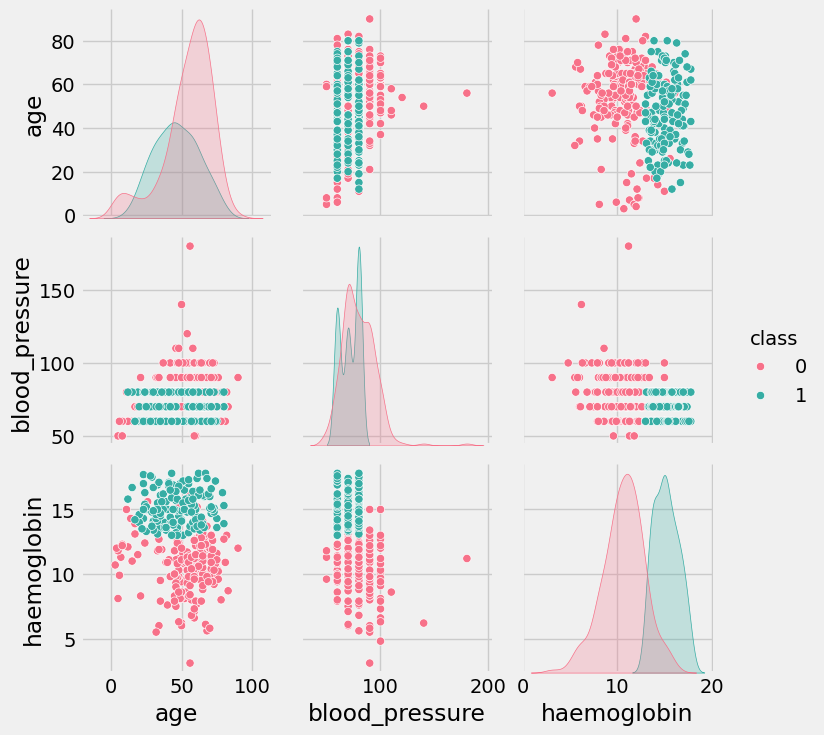

In [ ]:
selected_columns = ['age', 'blood_pressure', 'haemoglobin', 'class']
sns.pairplot(df[selected_columns], hue='class', palette='husl')

In [ ]:
df[selected_columns].corr()

,age,blood_pressure,haemoglobin,class
age,1.000000,0.159480,-0.192928,-0.227268
blood_pressure,0.159480,1.000000,-0.306540,-0.294077
haemoglobin,-0.192928,-0.306540,1.000000,0.768919
class,-0.227268,-0.294077,0.768919,1.000000


<Axes: >

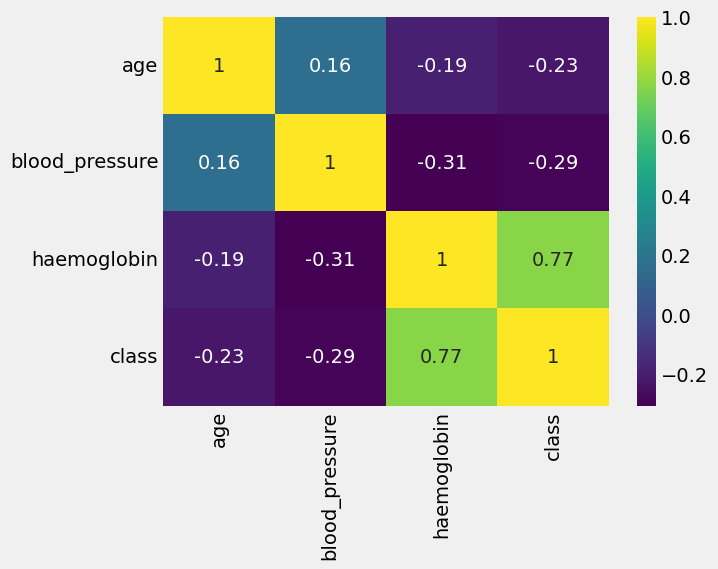

In [ ]:
sns.heatmap(df[selected_columns].corr(), annot = True, cmap = 'viridis')

In [ ]:
fig1 = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin', title='3D Visualization of Haemoglobin Count')

fig1.show()